1. Importamos nuestro Dataset. Contiene todos los cuadros vendidos en Christie´s del maestro Fernando Botero.

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

df_botero=pd.read_excel(r"C:\Users\param\OneDrive\Escritorio\Programacion\Botero\Prueba Botero.xlsx")
df_botero= df_botero.fillna(0)

2. EDA- Vamos analizar cuales son las variables con mayor correlación con el precio del cuadro. Ya sea negativo o positivo.
Es importante anotar que gran parte de esta sección vamos a crear muchos dataframes de copia solo para el análisis exploratorio. 
El dataframe original siempre será df_botero y luego crearemos un dataframe para el modelo.

2.1.1 El primer paso es explorar la variable "Venta"- el precio al que se vendio el cuadro.

In [67]:
# Desactivar notación científica globalmente
pd.set_option("display.float_format", lambda x: f"{x:,.0f}")

# Mostrar resumen estadístico
print(df_botero["Venta"].describe())


count          51
mean      902,981
std       892,194
min       137,989
25%       390,600
50%       675,019
75%     1,069,362
max     5,132,000
Name: Venta, dtype: float64


Hay cuadros desde US $137.000 dólares hasta US $5.1 millones. No obstante, solo 25% de los cuadros rompen el precio de US $1 millón. El promedio del precio de un cuadro es de US $900 mil. 
La distribución del precio de venta visualmente es la siguiente:

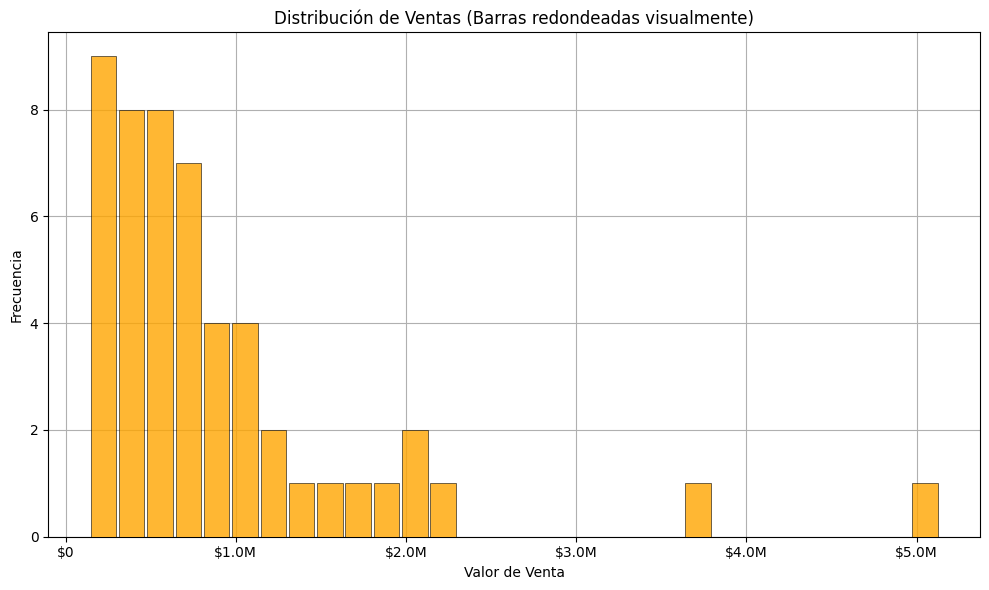

675019.0


In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Función para formatear en dólares
def formato_dolares(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

# Datos
valores = df_botero["Venta"].dropna()
conteo, bordes = np.histogram(valores, bins=30)
centros = (bordes[:-1] + bordes[1:]) / 2
anchos = np.diff(bordes)

# Crear gráfico
plt.figure(figsize=(10, 6))

# Dibujar barras redondeadas
for x, y, w in zip(centros, conteo, anchos):
    plt.bar(x, y, width=w * 0.9, align='center',
            color='orange', alpha=0.8,
            edgecolor='black', linewidth=0.5,
            zorder=3)

# Títulos y etiquetas
plt.title("Distribución de Ventas (Barras redondeadas visualmente)")
plt.xlabel("Valor de Venta")
plt.ylabel("Frecuencia")
plt.grid(True, zorder=0)

# Formato de eje X
plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_dolares))

plt.tight_layout()
plt.show()

print(df_botero["Venta"].median())

2.1.2 ¿Se distribuye con una normal? 
Respuesta: NO

In [69]:
#Realizamos la prueba Shapiro-Wilk
from scipy.stats import shapiro

stat, p = shapiro(df_botero["Venta"].dropna())
print(f"Estadístico: {stat:.4f}, p-valor: {p:.4f}")

if p > 0.05:
    print("✅ No se rechaza la normalidad (distribución aproximadamente normal).")
else:
    print("❌ Se rechaza la normalidad (no es normal).")


Estadístico: 0.6940, p-valor: 0.0000
❌ Se rechaza la normalidad (no es normal).


La variable VENTA tiene un sesgo positivo- Right-skewed distribution. Se ve visualmente y tambien que la Media (U$900) > Mediana (U$675)... cuando en una distribucion normal se esperaría valores más cercanos. 

Si el promedio es U$900 y la desviación estandar es U$892 (casi iguales) significa que hay ALTA variabilidad con una cola fuerte hacia la derecha. 

Vamos a quitar los DOS outlyers solo para tener una idea como cambian los valores estadísticos. 

2.1.3 Quitemos los dos outlyers fuertes para observar si mejora la distribucion hacia una normal y como afecta las medidas de tendencia central.

In [70]:
print(df_botero["Venta"].sort_values(ascending=False).head(3))

1    5132000
0    3680000
2    2158690
Name: Venta, dtype: int64


In [71]:
df_ventas_sin_outliers = df_botero[df_botero["Venta"] < 3_000_000]

# Mostrar resumen estadístico
print(df_ventas_sin_outliers["Venta"].describe())
print(df_ventas_sin_outliers["Venta"].median())


count          49
mean      760,001
std       524,451
min       137,989
25%       378,000
50%       630,000
75%     1,008,000
max     2,158,690
Name: Venta, dtype: float64
630000.0


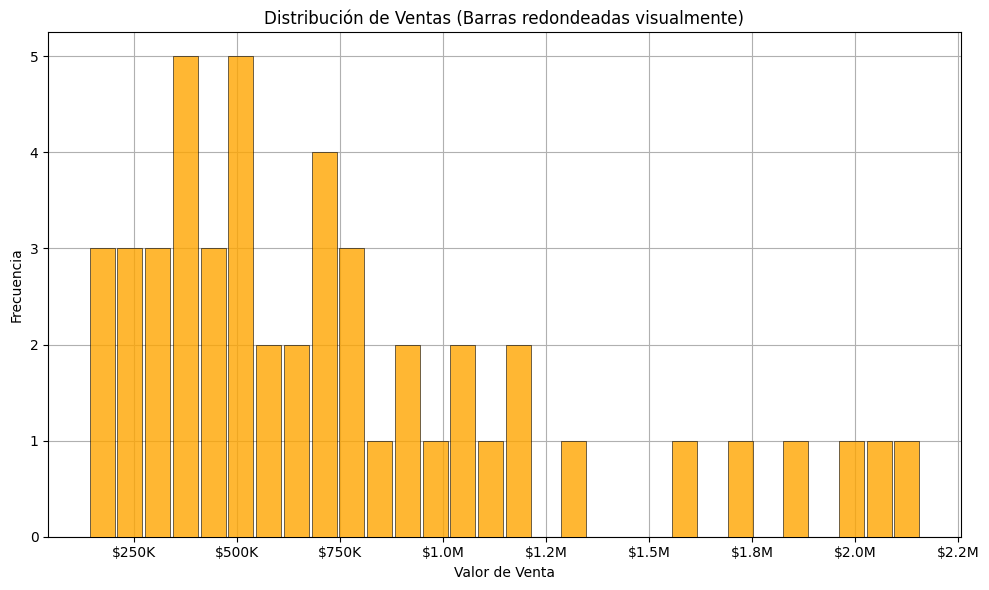

In [72]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Función para formatear en dólares
def formato_dolares(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

# Datos
valores = df_ventas_sin_outliers["Venta"].dropna()
conteo, bordes = np.histogram(valores, bins=30)
centros = (bordes[:-1] + bordes[1:]) / 2
anchos = np.diff(bordes)

# Crear gráfico
plt.figure(figsize=(10, 6))

# Dibujar barras redondeadas
for x, y, w in zip(centros, conteo, anchos):
    plt.bar(x, y, width=w * 0.9, align='center',
            color='orange', alpha=0.8,
            edgecolor='black', linewidth=0.5,
            zorder=3)

# Títulos y etiquetas
plt.title("Distribución de Ventas (Barras redondeadas visualmente)")
plt.xlabel("Valor de Venta")
plt.ylabel("Frecuencia")
plt.grid(True, zorder=0)

# Formato de eje X
plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_dolares))

plt.tight_layout()
plt.show()


In [73]:
# Realizamos la prueba otra vez...
stat, p = shapiro(df_ventas_sin_outliers["Venta"].dropna())
print(f"Estadístico: {stat:.4f}, p-valor: {p:.4f}")

if p > 0.05:
    print("✅ No se rechaza la normalidad (distribución aproximadamente normal).")
else:
    print("❌ Se rechaza la normalidad (no es normal).")

Estadístico: 0.8733, p-valor: 0.0001
❌ Se rechaza la normalidad (no es normal).


Mejoró el p-valor un poco, pero aún así está lejos de ser una distribución normal. No osbtante SI cambio considerable las medidas de tendencia central. Media bajo a U$760 y mediana a U$630 y hubo una mayor separacion entre desviación estandar y media. Esto significa que sigue habiendo un sesgo positivo pero en menor grado. 

2.2.1 Exploramos la variable FECHA y como afecta el valor del cuadro.

In [74]:
# Columnas que indican décadas
columnas = ['50-59', '60-69', '70-79', '80-89',
            '90-99', '2000-09', '2010-2019']

# Extraer las columnas y aplicar copia segura
df_botero_fecha = df_botero[columnas].copy()

# Dummificar con apply + map (recomendado)
df_botero_fecha = df_botero_fecha.apply(lambda col: col.map(lambda x: 1 if pd.notnull(x) and x != 0 else 0))

# Añadir la columna 'Venta'
df_botero_fecha['Venta'] = df_botero['Venta']
df_botero_fecha.head(2)


,50-59,60-69,70-79,80-89,90-99,2000-09,2010-2019,Venta
0,0,0,1,0,0,0,0,3680000
1,0,0,1,0,0,0,0,5132000


In [75]:
# La idea es obtener el total de los cuadros vendidos por década.
ventas_por_decada = {}

for decada in columnas:
    # Filtrar solo las filas donde esa década es 1
    mask = df_botero_fecha[decada] == 1
    ventas_decada = df_botero_fecha.loc[mask, 'Venta']
    
    # Guardar la lista de ventas
    ventas_por_decada[decada] = ventas_decada.tolist()


promedios_por_decada = {decada: (sum(ventas) / len(ventas) if len(ventas) > 0 else 0)
                        for decada, ventas in ventas_por_decada.items()}

# Obtenemos el promedio de ventas por cada decada.
promedios_por_decada

{'50-59': 182700.0,
 '60-69': 446980.14285714284,
 '70-79': 1277113.0833333333,
 '80-89': 1144010.3333333333,
 '90-99': 533513.1111111111,
 '2000-09': 651844.2,
 '2010-2019': 1360865.25}

2.2.2 Obtenemos una grafica que muestra la cantidad de obras vendidas por decada de fabricación con su promedio de venta.

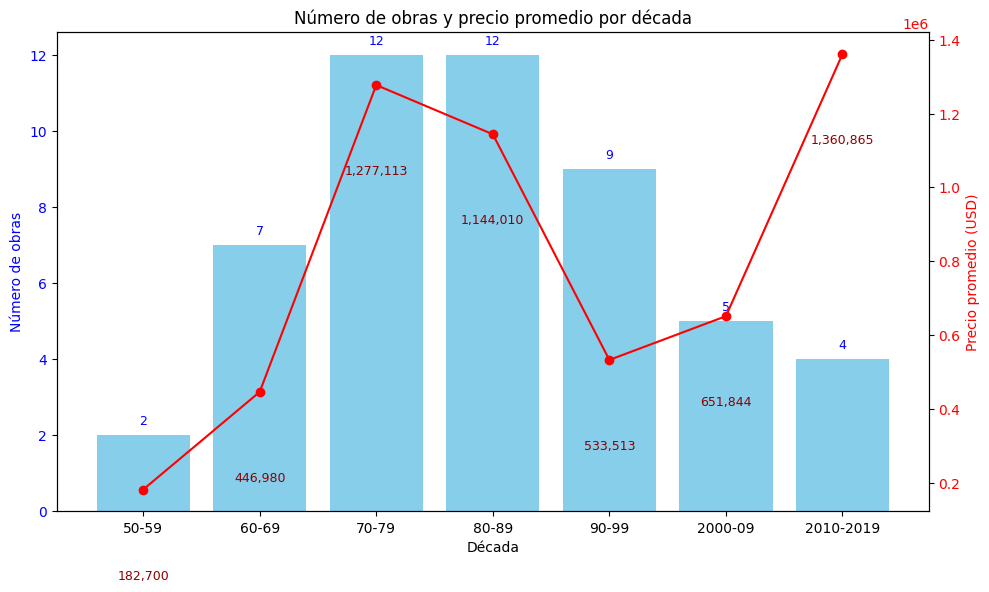

In [76]:

# Calcular totales por década
totales_por_decada = df_botero_fecha[columnas].sum().to_dict()

# Crear figura y eje primario
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje secundario
ax2 = ax1.twinx()

# Datos
decadas = list(promedios_por_decada.keys())
valores_barras = list(totales_por_decada.values())
valores_linea = list(promedios_por_decada.values())

# Gráfico de barras (número de obras)
bars = ax1.bar(decadas, valores_barras, color='skyblue', label='Número de obras')
ax1.set_ylabel('Número de obras', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{int(height)}',
             ha='center', va='bottom', fontsize=9, color='blue')

# Gráfico de línea (precio promedio)
ax2.plot(decadas, valores_linea, color='red', marker='o', label='Precio promedio (USD)')
ax2.set_ylabel('Precio promedio (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Añadir etiquetas a los puntos de la línea
for i, valor in enumerate(valores_linea):
    ax2.text(decadas[i], valor - 250000, f'{int(valor):,}',
             ha='center', va='bottom', fontsize=9, color='darkred')

# Títulos y estética
plt.title("Número de obras y precio promedio por década")
ax1.set_xlabel("Década")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


Los cuadros antes del año 70, es decir entre el 1950-1969, muestra los precios promedios más bajos del dataset. Esto se explica porque el artista aún no ha desarrollado su estilo personal y sus obras no tienen "Boterismo" sino más bien una busqueda personal entre otras corrientes artísticas como el surrealismo, figurativismo y expresionismo.

En el año 70 es cuando encuentra el "Boterismo" y es el inicio de su fama mundial con un aumento considerable del precio. De acuerdo al dataset 1970 tiene un precio promedio más alto que es solo superado por la década 2010-2019. Es algo curioso este dato: ¿Hay pocos cuadros elaborados en la decada 2010-2019? ¿Es posible que hayan cuadros subvalorados en la decada 1970, dado que los dos grandes outlyers son de la misma década?

También es curioso reconocer una caída sustancial en los precios vendidos entre 90-2009, cuando Botero ya ha encontrado su estilo.

Estas preguntas son preliminares y a medida que exploremos los datos, encontraremos más respuestas.

2.3.1 Realizamos un análisis por tamaño del cuadro.

Creamos un scatter graph para observar visualmente si existe alguna correlacion positiva.

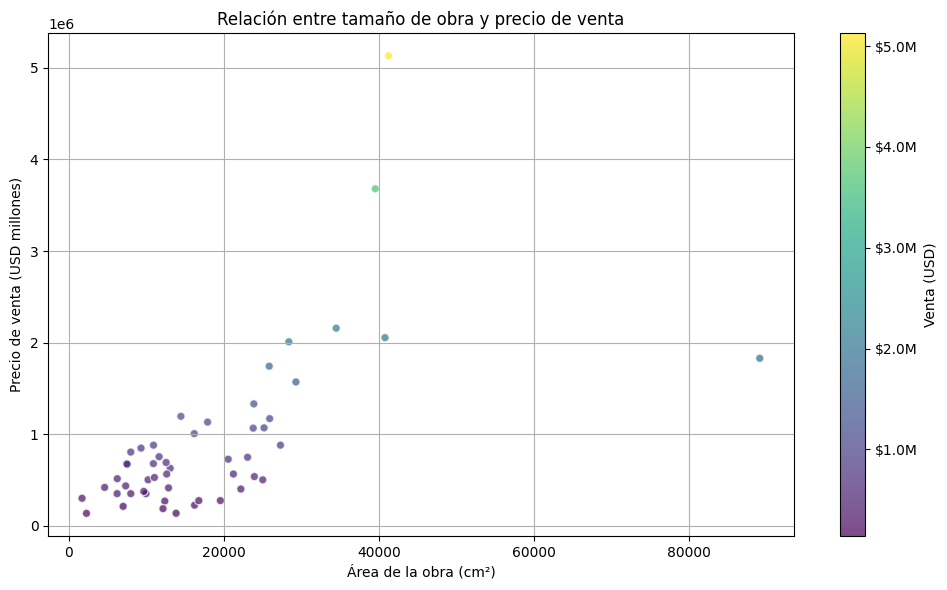

In [77]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formateador en dólares
def formato_dolares(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

# Data
x = df_botero["Ancho"] * df_botero["Altura"]  # Tamaño total
y = df_botero["Venta"]  # Precio

# Crear scatter plot con color basado en valor de venta
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=y, cmap='viridis', alpha=0.7, edgecolors='w')

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Venta (USD)')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(formato_dolares))

# Etiquetas y título
plt.xlabel("Área de la obra (cm²)")
plt.ylabel("Precio de venta (USD millones)")
plt.title("Relación entre tamaño de obra y precio de venta")
plt.grid(True)
plt.tight_layout()
plt.show()


Observamos una correlación positiva visualmente, pero realizamos un HEATMAP para obtener un indicador entre area, alto, largo y su precio.

        Altura  Ancho  Área  Venta
Altura       1      1     1      1
Ancho        1      1     1      1
Área         1      1     1      1
Venta        1      1     1      1


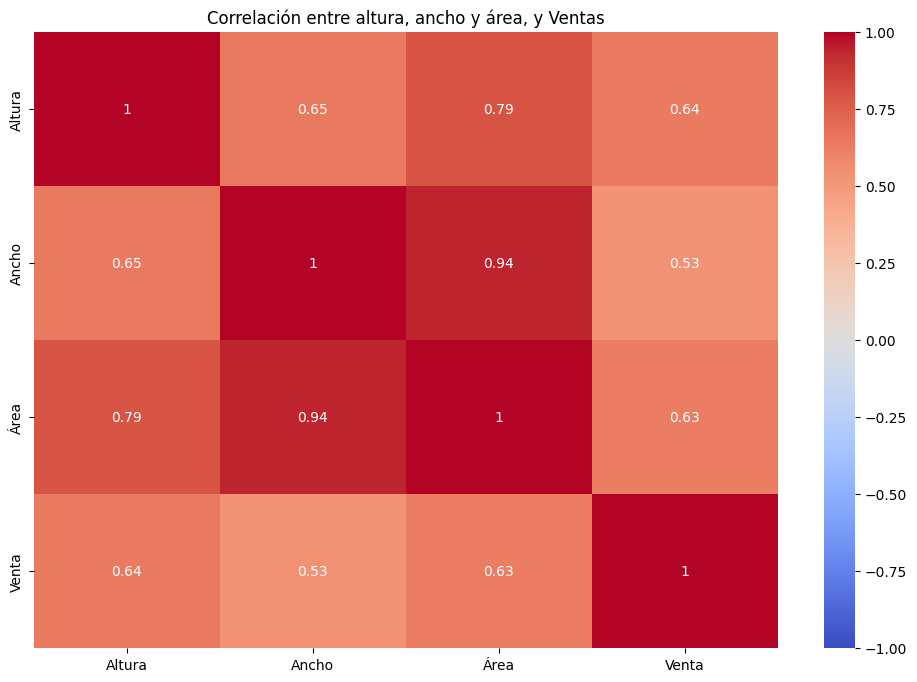

In [78]:
# Agregamos una nueva variable- Area
df_botero["Área"] = df_botero["Altura"] * df_botero["Ancho"]

# Creamos HeatMap de correlación
corr_matrix = df_botero[["Altura", "Ancho", "Área", "Venta"]].corr()
print(corr_matrix)

# Heatmap visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # You can change (12, 8) to whatever size you prefer

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0
)
plt.title("Correlación entre altura, ancho y área, y Ventas")
plt.show()


La correlación es muy alta entre el tamaño y el precio. Es pertinente anotar que la ALTURA tiene mas correlación que el ancho para determinar el valor de un cuadro de Botero.

El siguiente paso es crear diferentes dummies que expliquen los tamaños de los cuadros que se van a juntar al dataframe df_botero. Se realiza la validación con el método del codo y se determina como hiperparametro 5 clusters.

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar tamaños y quitar nulos
tamaños = df_botero[["Altura", "Ancho"]].dropna().copy()

# Calcular área
tamaños["Area"] = tamaños["Altura"] * tamaños["Ancho"]

# Clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
tamaños["Cluster"] = kmeans.fit_predict(tamaños[["Altura", "Ancho"]])

# Reordenar clusters por área promedio
centroides = tamaños.groupby("Cluster")["Area"].mean().sort_values().index
nombres = ["pequeño", "mediano-pequeño", "mediano-grande", "grande", "colección"]
cluster_names = dict(zip(centroides, nombres))

# Asignar categorías
tamaños["Categoria"] = tamaños["Cluster"].map(cluster_names)

# Crear dummies con 0 y 1
dummies = pd.get_dummies(tamaños["Categoria"], prefix="tamaño").astype(int)

# Concatenar
tamaños = pd.concat([tamaños, dummies], axis=1)

# Unir al DataFrame original
df_botero = df_botero.join(tamaños[["Categoria"] + list(dummies.columns)])
#Se elimina las variables que no usaremos
df_botero = df_botero.drop(columns=["Categoria","Altura","Ancho"], axis=1)


In [80]:
#Se verifica si las dummies quedaron bien.
df_botero.head(2)


,Nombre cuadro,50-59,60-69,70-79,80-89,90-99,2000-09,2010-2019,Marlborough NY_paso,NY_paso,...,Personal,Carbon,Busqueda(sin Boterismo),URL,Área,tamaño_colección,tamaño_grande,tamaño_mediano-grande,tamaño_mediano-pequeño,tamaño_pequeño
0,The Playroom,0,0,"1,970",0,0,0,0,1,0,...,0,0,0,https://www.christies.com/en/lot/lot-6509437,"39,526",0,1,0,0,0
1,The Musicians,0,0,"1,979",0,0,0,0,1,1,...,0,0,0,https://www.christies.com/en/lot/lot-6453127,"41,246",0,1,0,0,0


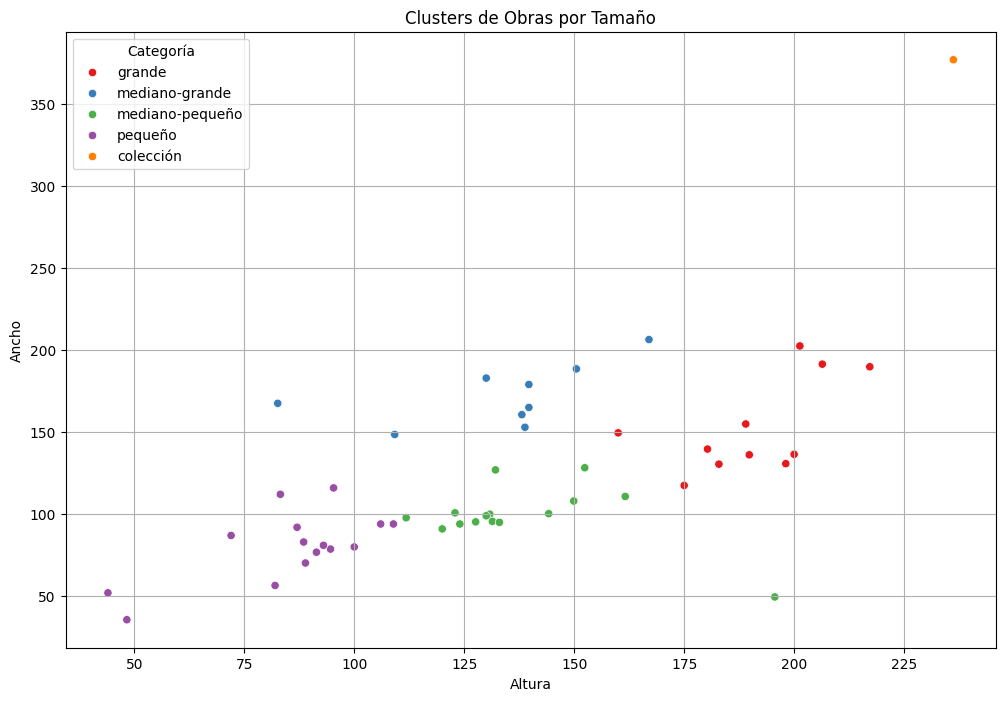

In [81]:
# Visualizar los 5 clusters de tamaños
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=tamaños,
    x="Altura",
    y="Ancho",
    hue="Categoria",
    palette="Set1"  
)
plt.title("Clusters de Obras por Tamaño")
plt.legend(title="Categoría")
plt.grid(True)
plt.show()


c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\param\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

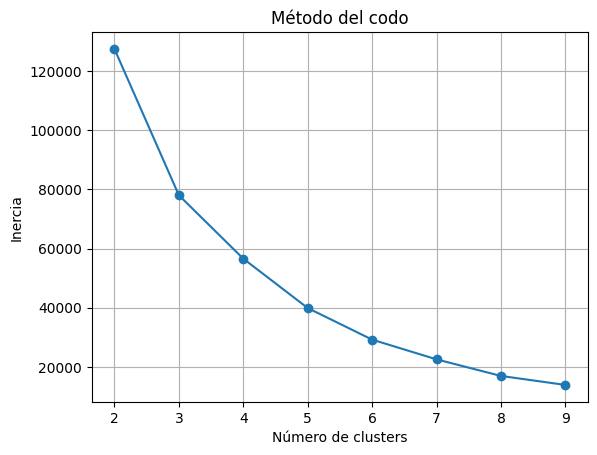

In [82]:
#Validación del método del codo

from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(tamaños[["Altura", "Ancho"]])
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(tamaños[["Altura", "Ancho"]], labels))

plt.plot(k_range, inertia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()


Conclusión- El tamaño es muy importante para determinar el valor de un cuadro del maestro Fernando Botero.
Se crearon 5 categorias dado que tiene sentido en el contexto del tamaño de los cuadros y el modelo lo permite. En la categoria mediano, se crearon 2 clusters: mediano-grande y mediano-pequeño que considero puede generar cierta diferencia al momento de calcular el precio de un cuadro que simplemente poner "mediano". Por otra parte, colección se refiere a varios cuadros que en su conjunto son 1 obra de arte. POr último se utilizó de grande y pequeño como clusters restantes. 

2.4.1 Se analiza la "Provenance" del cuadro... ¿En donde ha estado el cuadro? Queremos analizar si existe alguna correlación entre un lugar particular y su precio.

In [83]:
# Columnas por donde paso

columnas = ['Marlborough NY_paso', 'NY_paso', 'USA_paso', 'Hong Kong_paso',
       'Londres_paso', 'Francia_paso', 'Europa_paso', 'Colombia_paso',
       'LATAM_paso', 'Dubai_paso', 'Sur-Africa']

# Extraer las columnas y copia segura
df_botero_pasado = df_botero[columnas].copy()

#Agregamos la variable venta
df_botero_pasado['Venta'] = df_botero['Venta']

#Sumamos cada cuadro que ha sido vendido de acuerdo al lugar
ventas_por_pais = {
    col: (df_botero[col] * df_botero["Venta"]).sum()
    for col in columnas
}

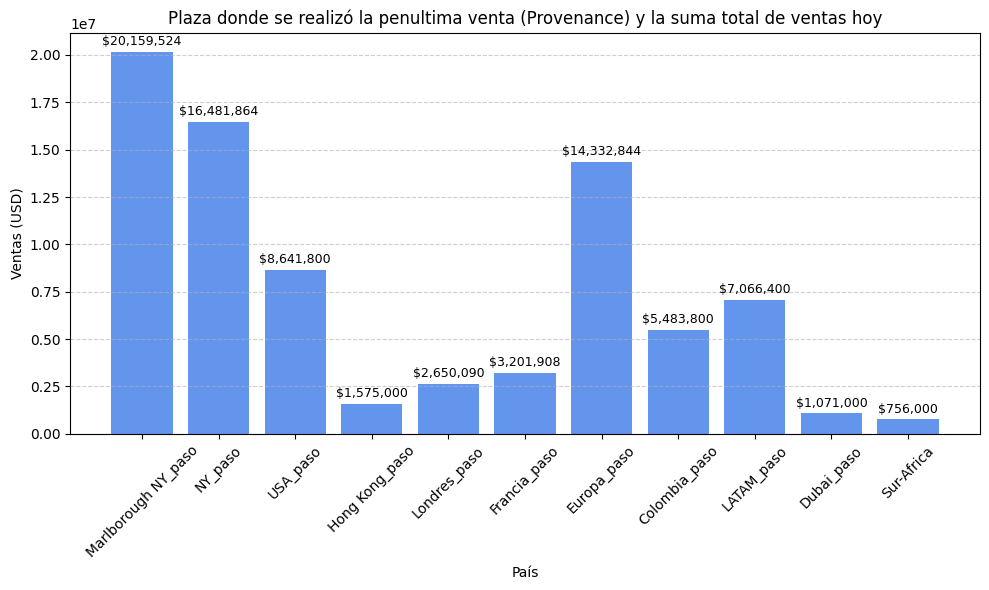

In [84]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_pais.keys(), ventas_por_pais.values(), color='cornflowerblue')

for pais, venta in ventas_por_pais.items():
    plt.text(pais, venta + max(ventas_por_pais.values())*0.01, f"${int(venta):,}",
             ha='center', va='bottom', fontsize=9)


# Estética
plt.title("Plaza donde se realizó la penultima venta (Provenance) y la suma total de ventas hoy")
plt.xlabel("País")
plt.ylabel("Ventas (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


2.4.2 Creamos mapa de correlación con los lugares por donde ha pasado.

                     Marlborough NY_paso  NY_paso  USA_paso  Hong Kong_paso  \
Marlborough NY_paso                    1        0         0               0   
NY_paso                                0        1        -0               0   
USA_paso                               0       -0         1              -0   
Hong Kong_paso                         0        0        -0               1   
Londres_paso                          -0       -0        -0              -0   
Francia_paso                          -0       -0        -0              -0   
Europa_paso                           -0        0        -0              -0   
Colombia_paso                         -0       -0         0              -0   
LATAM_paso                             0        0         0              -0   
Dubai_paso                             0       -0         0              -0   
Sur-Africa                            -0       -0        -0              -0   
Venta                                  0        0   

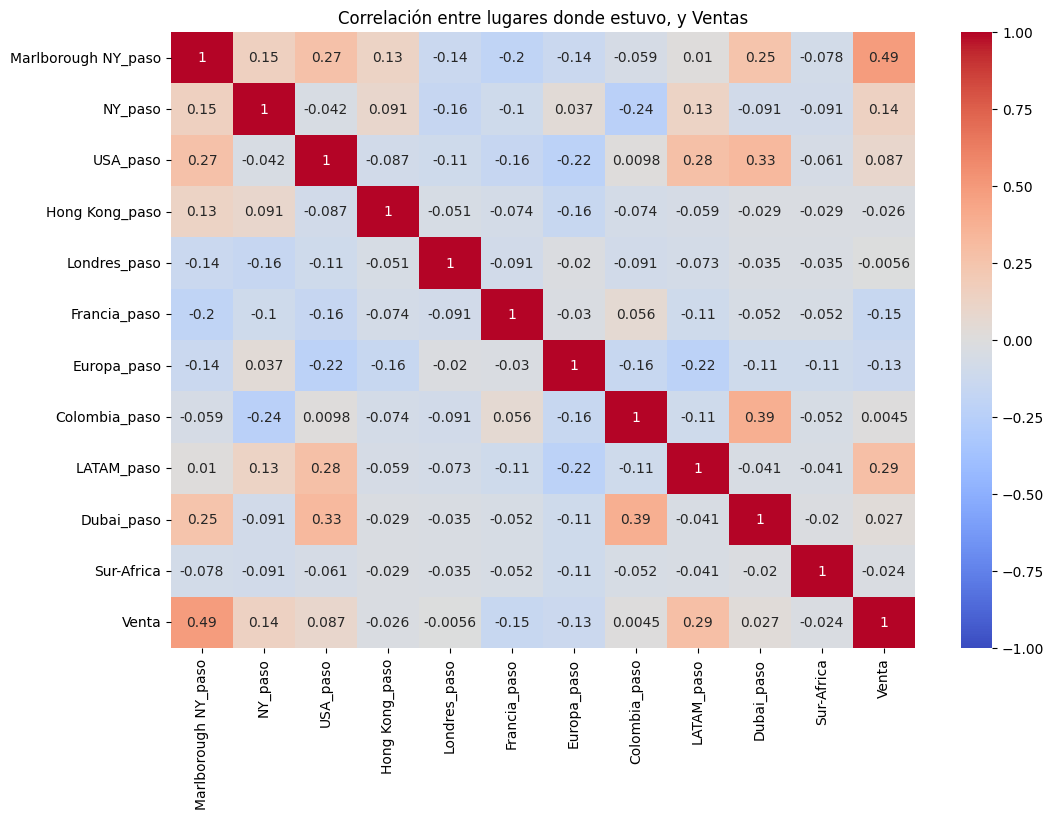

In [85]:
# Las columnas a usar para el lugar
corr_matrix = df_botero[['Marlborough NY_paso', 'NY_paso', 'USA_paso', 'Hong Kong_paso',
       'Londres_paso', 'Francia_paso', 'Europa_paso', 'Colombia_paso',
       'LATAM_paso', 'Dubai_paso', 'Sur-Africa', "Venta"]].corr()
print(corr_matrix)

# Heatmap visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # You can change (12, 8) to whatever size you prefer
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0
)
plt.title("Correlación entre lugares donde estuvo, y Ventas")
plt.show()


Conclusión- Dado que el dataset tiene el problema que hay cuadros sin referencia de "Provenance" y en el que se pusieron como imputación de datos "Colombia", vamos a usar solamente de la variable Marlborough NY gallery. Esto además porque tiene sentido en el contexto de la obra del maestro Fernando Botero- esta galería fue la que le apostó a la carrera de Botero desde 1970. El resto de las variables las eliminaremos porque es poca su correlación.

In [86]:
df_botero=df_botero.drop(columns=['NY_paso', 'USA_paso', 'Hong Kong_paso',
       'Londres_paso', 'Francia_paso', 'Europa_paso', 'Colombia_paso',
       'LATAM_paso', 'Dubai_paso', 'Sur-Africa'],axis=1)

2.5.1 Ahora vamos a realizar el estudio de los lugares donde se ha comprado. Esto sólo es ilustrativo dado que esta variable no tiene sentido para explicar el modelo de venta. Sólo se estudia para entender donde se podría vender más facilmente un cuadro de Botero. 

In [87]:
# Dueños actuales- precio
columnas = ['NY_hoy', 'USA_hoy', 'Londres_hoy', 'Francia_hoy', 'Europa_hoy',
       'LATAM_hoy', 'Colombia_hoy', 'Hong Kong_hoy', 'Canada_hoy']

# Crear diccionario de ventas por país
ventas_por_pais_actual = {
    col: (df_botero[col] * df_botero['Venta']).sum()
    for col in columnas
}


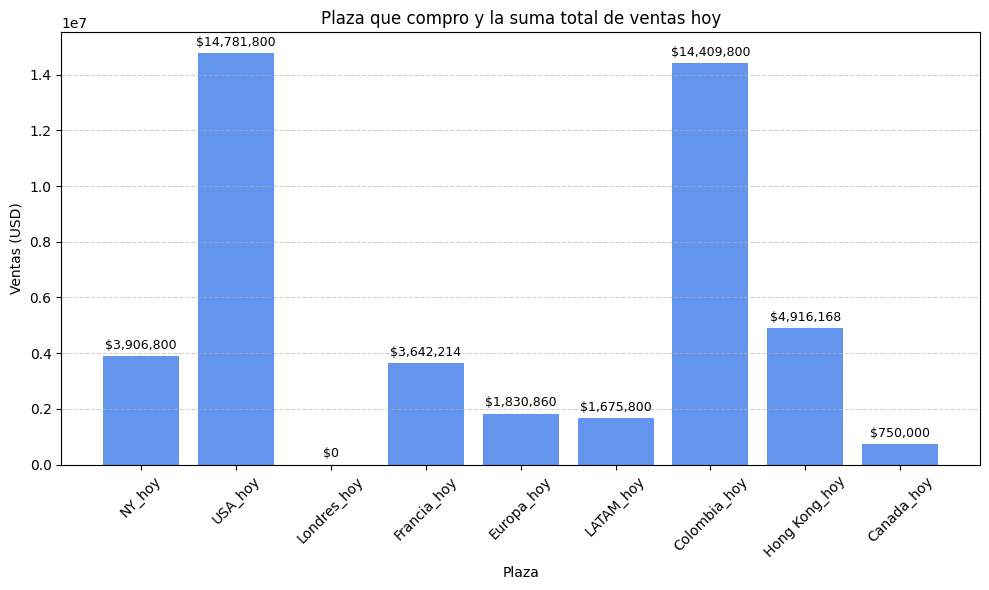

In [88]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ventas_por_pais_actual.keys(), ventas_por_pais_actual.values(), color='cornflowerblue')

for pais, venta in ventas_por_pais_actual.items():
    plt.text(pais, venta + max(ventas_por_pais_actual.values())*0.01, f"${int(venta):,}",
             ha='center', va='bottom', fontsize=9)


# Estética
plt.title("Plaza que compro y la suma total de ventas hoy")
plt.xlabel("Plaza")
plt.ylabel("Ventas (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [89]:
df_botero=df_botero.drop(columns=['NY_hoy', 'USA_hoy', 'Londres_hoy', 'Francia_hoy', 'Europa_hoy',
       'LATAM_hoy', 'Colombia_hoy', 'Hong Kong_hoy', 'Canada_hoy'],axis=1)

Conclusión- El mercado con mayor prospecto para vender un cuadro es en USA. Colombia no es real dado que fue una imputación de datos- son datos donde Christie's no especifica ningún tipo de información del comprador. Todas estas variables son eliminadas para el modelo.

2.6.1 ¿Existe alguna relación entre tener un cuadro mucho tiempo en una colección privada y luego salir al mercado a venderla??

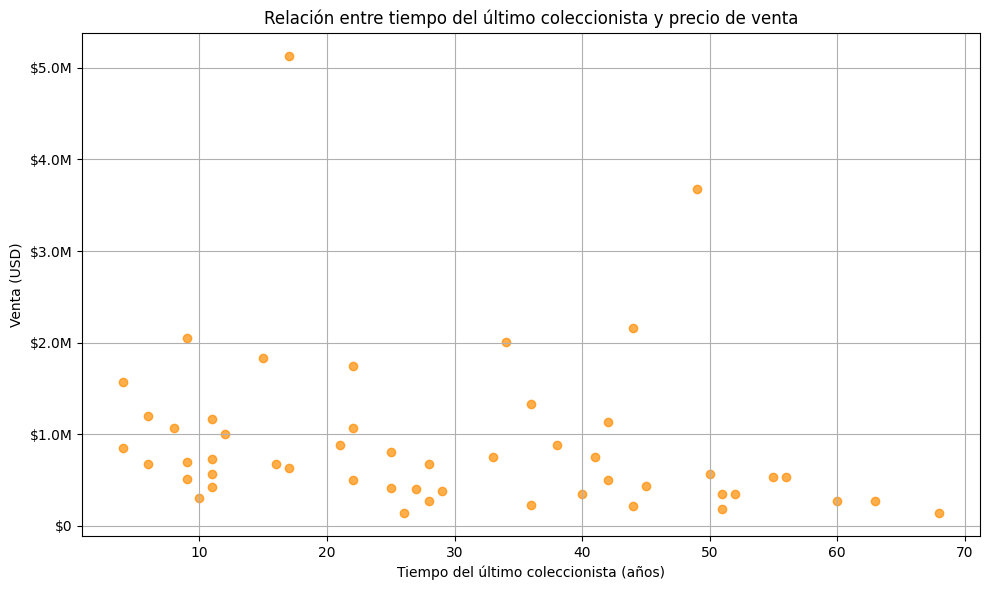

In [90]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formateador para eje Y
def formato_millones(x, pos):
    if x >= 1_000_000:
        return f"${x/1_000_000:.1f}M"
    elif x >= 1_000:
        return f"${x/1_000:.0f}K"
    else:
        return f"${x:.0f}"

# Calcular tiempo entre penúltima y última venta
df_botero["Tiempo_colector"] = df_botero["Año ultima venta"] - df_botero["Año penultima venta"]

# Eliminar valores nulos o incorrectos
df_temp = df_botero[["Tiempo_colector", "Venta"]].dropna()

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_temp["Tiempo_colector"], df_temp["Venta"], color='darkorange', alpha=0.7)

# Estética
ax.set_title("Relación entre tiempo del último coleccionista y precio de venta")
ax.set_xlabel("Tiempo del último coleccionista (años)")
ax.set_ylabel("Venta (USD)")
ax.yaxis.set_major_formatter(FuncFormatter(formato_millones))
ax.grid(True)
plt.tight_layout()
plt.show()


Conclusión- Observamos que no hay ninguna relación. Hay cuadros con casi 70 años en una colección privada y su valor no aumenta.
Eliminamos todas estas variables

In [91]:
df_botero=df_botero.drop(columns=["Tiempo_colector","Año ultima venta","Año penultima venta"],axis=1)

2.7.1 ¿Está sobre-valorado o Sub-valorado Botero? Una manera para responder a esta pregunta es saber cuantas veces rompe el máximo de la subasta- si lo rompe podremos crear una dummie para ese cuadro.

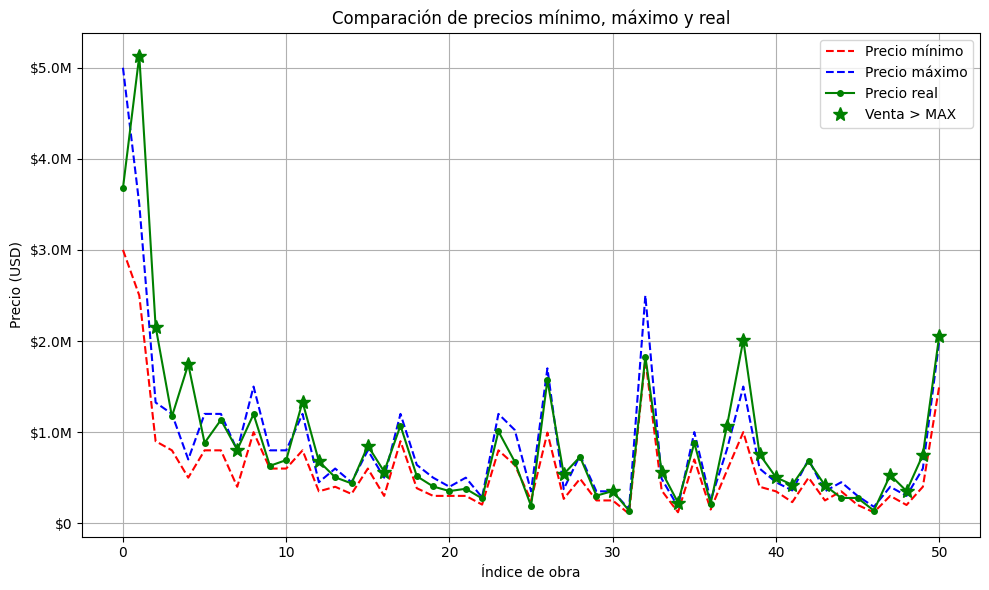

In [92]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formateador en dólares
def formato_dolares(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las 3 líneas
ax.plot(df_botero['MIN'], label="Precio mínimo", color='red', linestyle='--')
ax.plot(df_botero["MAX"], label="Precio máximo", color='blue', linestyle='--')
ax.plot(df_botero["Venta"], label="Precio real", color='green', marker='o', markersize=4)

# Condición: Venta > MAX
cond = df_botero["Venta"] > df_botero["MAX"]

# Agregar marcador especial para esas condiciones
ax.plot(df_botero.index[cond], df_botero["Venta"][cond],
        linestyle='None', marker='*', color='green', markersize=10, label="Venta > MAX")

# Formato del eje Y
ax.yaxis.set_major_formatter(FuncFormatter(formato_dolares))

# Estética
ax.set_title("Comparación de precios mínimo, máximo y real")
ax.set_xlabel("Índice de obra")
ax.set_ylabel("Precio (USD)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Cada estrella representa cuando se rompe el límite del máximo establecido por Christie's, lo que hace considerar que Botero esta sub-valorado. Creamos una dummy donde se pone 1 si rompe el máximo y 0 sino. 

In [93]:
#Creamos dummy
df_botero["venta_sobre_max"] = (df_botero["Venta"] > df_botero["MAX"]).astype(int)

#Eliminamos las columnas min y max
df_botero=df_botero.drop(columns=["MIN","MAX"],axis=1)

2.8.1 Vamos analizar como la literatura sobre un cuadro afecta el precio de un cuadro

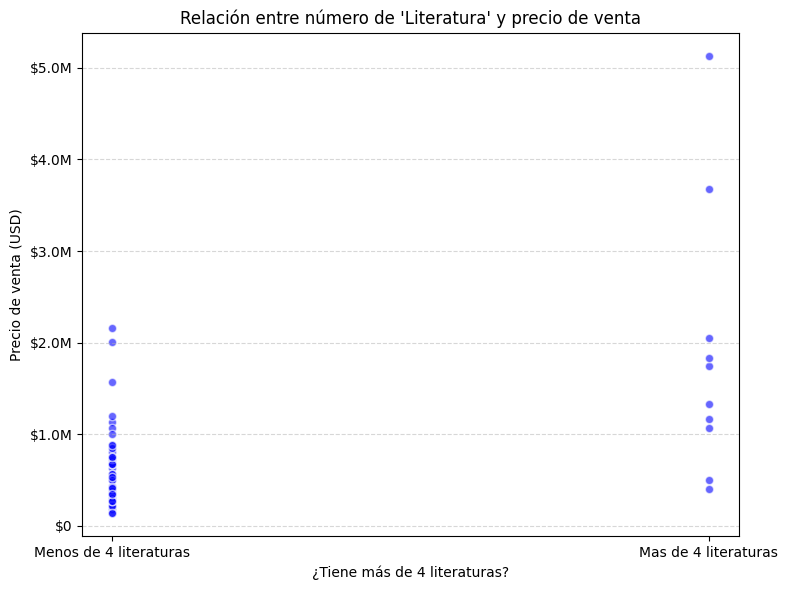

In [94]:
# Funcion para poner $
def formato_dolares(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

# Solo literatura
df_literatura = df_botero[[' 1,2,3 literaturas','Mas de 4 literaturas', "Venta"]].dropna()

# Scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_literatura['Mas de 4 literaturas'], df_literatura["Venta"], alpha=0.6, color='blue', edgecolors='w')

# Y-axis en dólares
ax.yaxis.set_major_formatter(FuncFormatter(formato_dolares))

# X- 0 y 1
ax.set_xticks([0, 1])
ax.set_xticklabels(["Menos de 4 literaturas", "Mas de 4 literaturas"])

# Descripción gráfico
ax.set_xlabel("¿Tiene más de 4 literaturas?")
ax.set_ylabel("Precio de venta (USD)")
ax.set_title("Relación entre número de 'Literatura' y precio de venta")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


2.8.2 Creamos un Heatmap para observar la correlación...

                       1,2,3 literaturas  Mas de 4 literaturas  Venta
 1,2,3 literaturas                     1                    -0     -0
Mas de 4 literaturas                  -0                     1      1
Venta                                 -0                     1      1


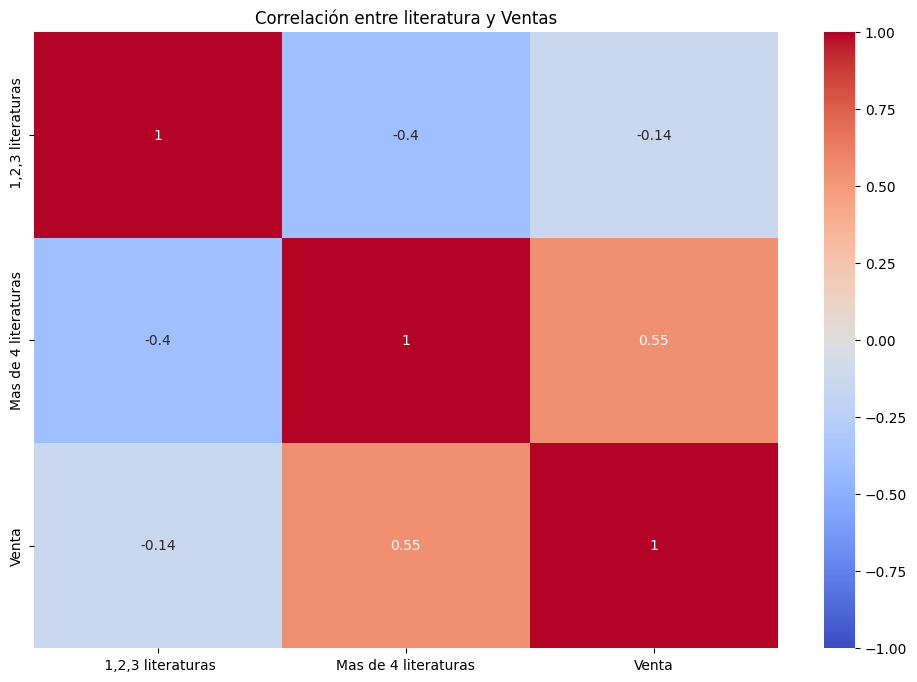

In [95]:
# Las columnas a usar para el lugar
corr_matrix = df_botero[[' 1,2,3 literaturas','Mas de 4 literaturas', "Venta"]].corr()
print(corr_matrix)

# Heatmap visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # You can change (12, 8) to whatever size you prefer
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0
)
plt.title("Correlación entre literatura y Ventas")
plt.show()


In [96]:
#Eliminamos las columnas que tienen menos de 4 literaturas. La dummie sólo sera 1 si tiene 4 literaturas o 0 si es menor que esto.
df_botero=df_botero.drop(columns=['Sin literatura', ' 1,2,3 literaturas'],axis=1)

2.9.1 ¿Es importante si la obra de arte ha sido exhibida? Vamos analizar su efecto en el precio

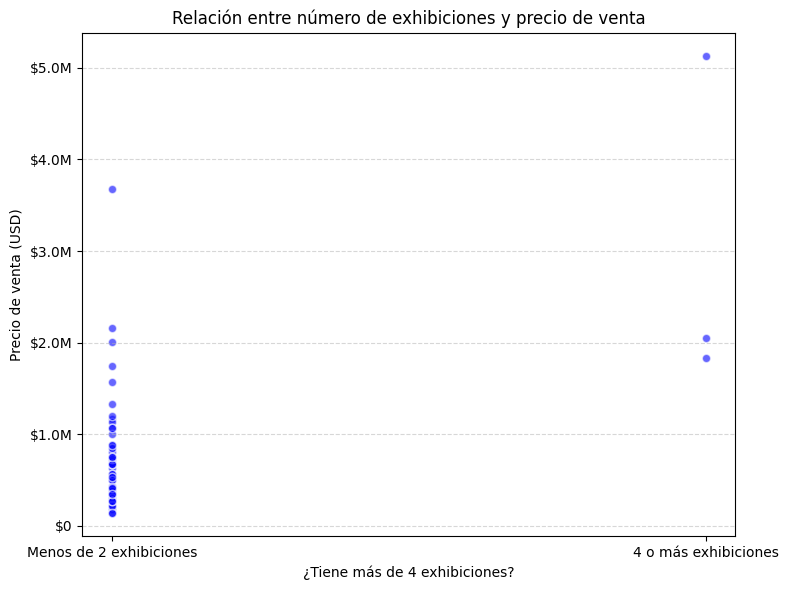

In [97]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Optional: Formatter for dollar values
def formato_dolares(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

# Filter valid rows
df_exhibicion = df_botero[['Mas de 4 exhibiciones', "Venta"]].dropna()

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_exhibicion['Mas de 4 exhibiciones'], df_exhibicion["Venta"], alpha=0.6, color='blue', edgecolors='w')

# Y-axis in dollars
ax.yaxis.set_major_formatter(FuncFormatter(formato_dolares))

# Improve X ticks (categorical)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Menos de 2 exhibiciones", "4 o más exhibiciones"])

# Labels and title
ax.set_xlabel("¿Tiene más de 4 exhibiciones?")
ax.set_ylabel("Precio de venta (USD)")
ax.set_title("Relación entre número de exhibiciones y precio de venta")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

                       NY_exhibicion  USA_exhibicion  Londres_exhibicion  \
NY_exhibicion                      1               0                   0   
USA_exhibicion                     0               1                  -0   
Londres_exhibicion                 0              -0                   1   
Paris_exhibicion                   0              -0                  -0   
Europa_exhibicion                  0               0                   0   
LATAM_exhibicion                  -0              -0                   0   
Colombia_exhibicion               -0              -0                  -0   
Mas de 4 exhibiciones              0               1                  -0   
Venta                              0               0                  -0   

                       Paris_exhibicion  Europa_exhibicion  LATAM_exhibicion  \
NY_exhibicion                         0                  0                -0   
USA_exhibicion                       -0                  0                -0   

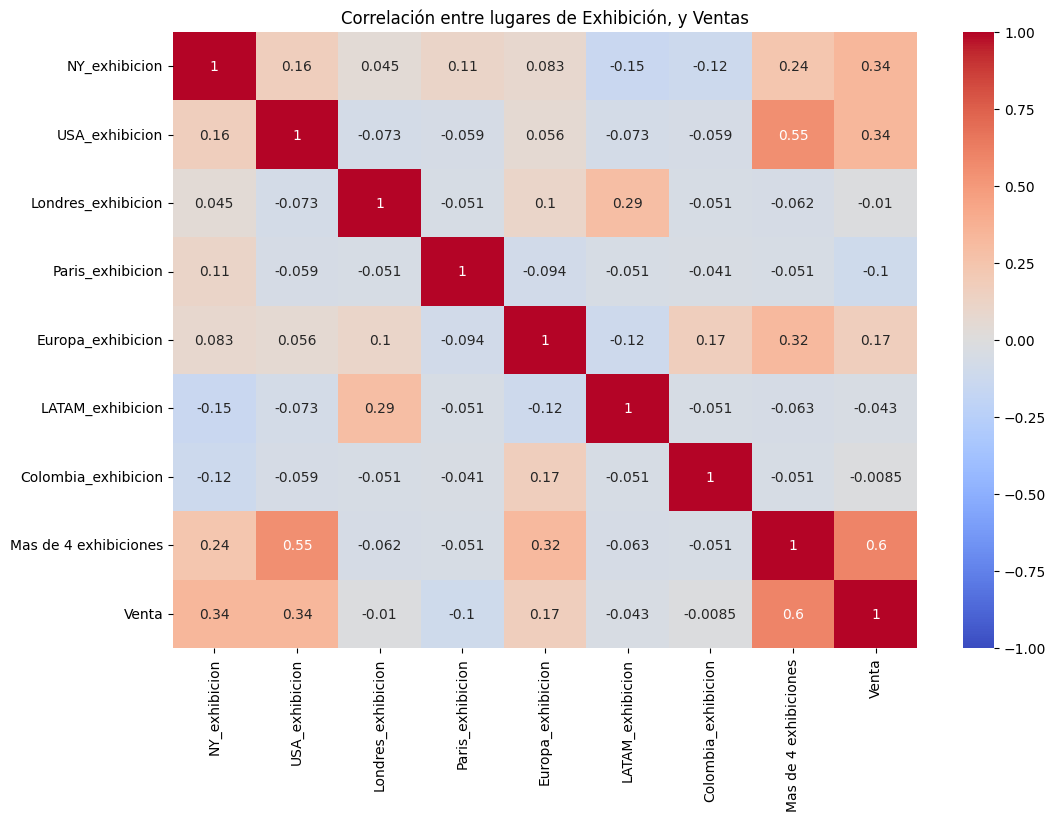

In [98]:
# Lugares donde se ha exhibido

corr_matrix = df_botero[['NY_exhibicion', 'USA_exhibicion', 'Londres_exhibicion',
       'Paris_exhibicion', 'Europa_exhibicion', 'LATAM_exhibicion',
       'Colombia_exhibicion', 'Mas de 4 exhibiciones', "Venta"]].corr()
print(corr_matrix)

# Heatmap visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # You can change (12, 8) to whatever size you prefer
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0
)
plt.title("Correlación entre lugares de Exhibición, y Ventas")
plt.show()


Conclusión- Solo dejaremos como variable mas de 4 ehibiciones. (Se realiza pruebas de endogeneidad y es preferible solo dejar una variable, la mas relevante).

In [99]:
df_botero=df_botero.drop(columns=['NY_exhibicion', 'USA_exhibicion', 'Londres_exhibicion',
       'Paris_exhibicion', 'Europa_exhibicion', 'LATAM_exhibicion',
       'Colombia_exhibicion'],axis=1)

2.10.1 ¿Cómo afecta la temática el valor de un cuadro? Vamos analizar esta sección..

In [100]:
#Seleccionamos las columnas que queremos analizar

columnas=["1 figura", '2 Figuras',
       'Grupo de figuras', 'Bodegon', 'Animales', 'Escenas urbanas/figuras',
       'Escenas rurales/Figuras', 'Escena hogar/ figuras', 'Historico',
       'Politico', 'Religion', 'Desnudo/ Erotico', 'Paisaje', 'Personal',
       'Carbon', 'Busqueda(sin Boterismo)']

# Extraer las columnas y crear copia segura
df_botero_tema= df_botero[columnas].copy()

# Añadir la columna 'Venta'
df_botero_tema['Venta'] = df_botero['Venta']

C:\Users\param\AppData\Local\Temp\ipykernel_8176\2688483841.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='center', fontsize=10)


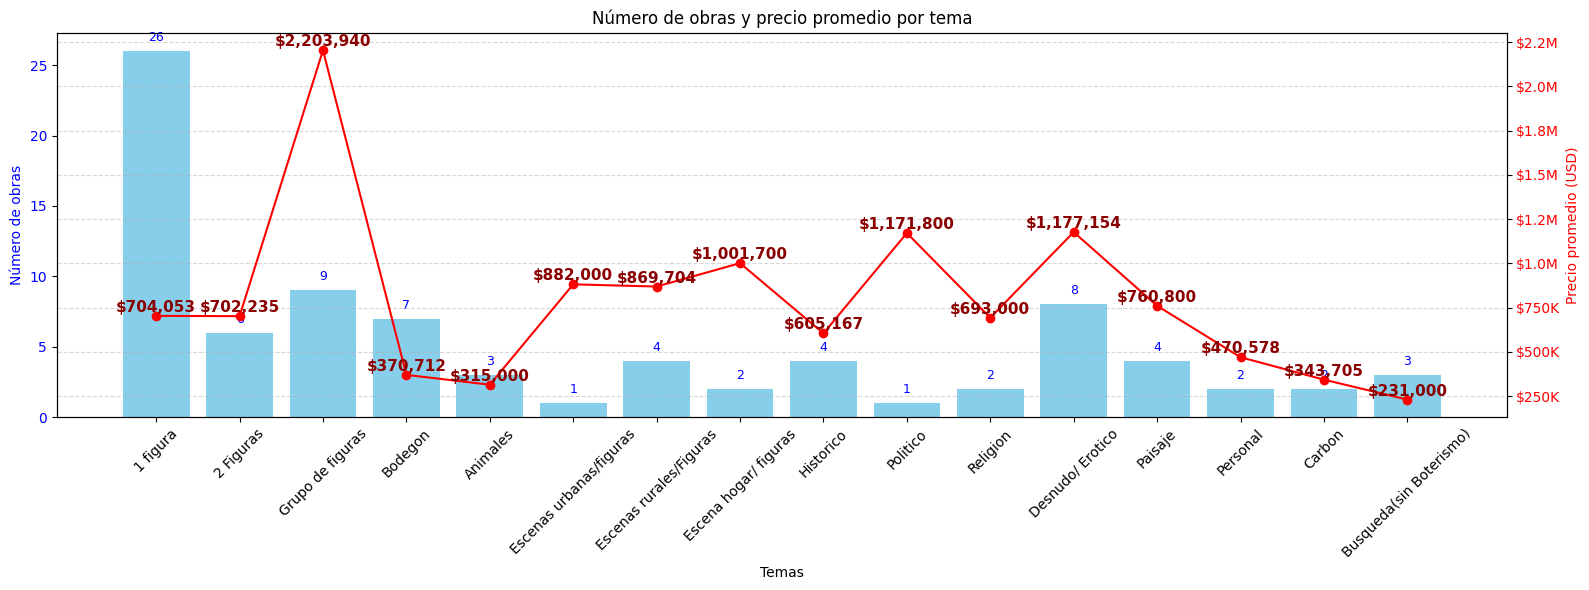

In [101]:

# Formateador de precios (USD)
def formato_dolares(x, pos):
    if x >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'${x/1_000:.0f}K'
    else:
        return f'${x:.0f}'

# Datos para crear análisis
totales_por_tema= df_botero_tema[columnas].sum().to_dict()
temas = list(totales_por_tema.keys())
valores_barras = list(totales_por_tema.values())
promedios_por_tema = {
    tema: df_botero_tema[df_botero_tema[tema] == 1]['Venta'].mean()
    for tema in columnas
}
valores_linea = list(promedios_por_tema.values())


# Crear gráfico con más ancho
fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()

# Gráfico de barras
bars = ax1.bar(temas, valores_barras, color='skyblue', label='Número de obras')
ax1.set_ylabel('Número de obras', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Etiquetas encima de las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontsize=9, color='blue')

# Gráfico de línea
ax2.plot(temas, valores_linea, color='red', marker='o', label='Precio promedio (USD)')
ax2.set_ylabel('Precio promedio (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(FuncFormatter(formato_dolares))

# Etiquetas de precio promedio
for i, valor in enumerate(valores_linea):
    ax2.text(i, valor + 5000, f'${int(valor):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='darkred')

# Estética
plt.title("Número de obras y precio promedio por tema")
ax1.set_xlabel("Temas")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='center', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()


2.10.2 Creamos un HeatMap para observar que tanto se relaciona con el precio de venta. 

                         1 figura  2 Figuras  Grupo de figuras  Bodegon  \
1 figura                        1         -0                -0       -0   
2 Figuras                      -0          1                -0       -0   
Grupo de figuras               -0         -0                 1       -0   
Bodegon                        -0         -0                -0        1   
Animales                       -0          0                -0        0   
Escenas urbanas/figuras        -0         -0                 0       -0   
Escenas rurales/Figuras        -0          0                -0       -0   
Escena hogar/ figuras          -0          0                -0       -0   
Historico                       0         -0                -0       -0   
Politico                        0         -0                -0       -0   
Religion                        0         -0                -0       -0   
Desnudo/ Erotico               -0          0                 0       -0   
Paisaje                  

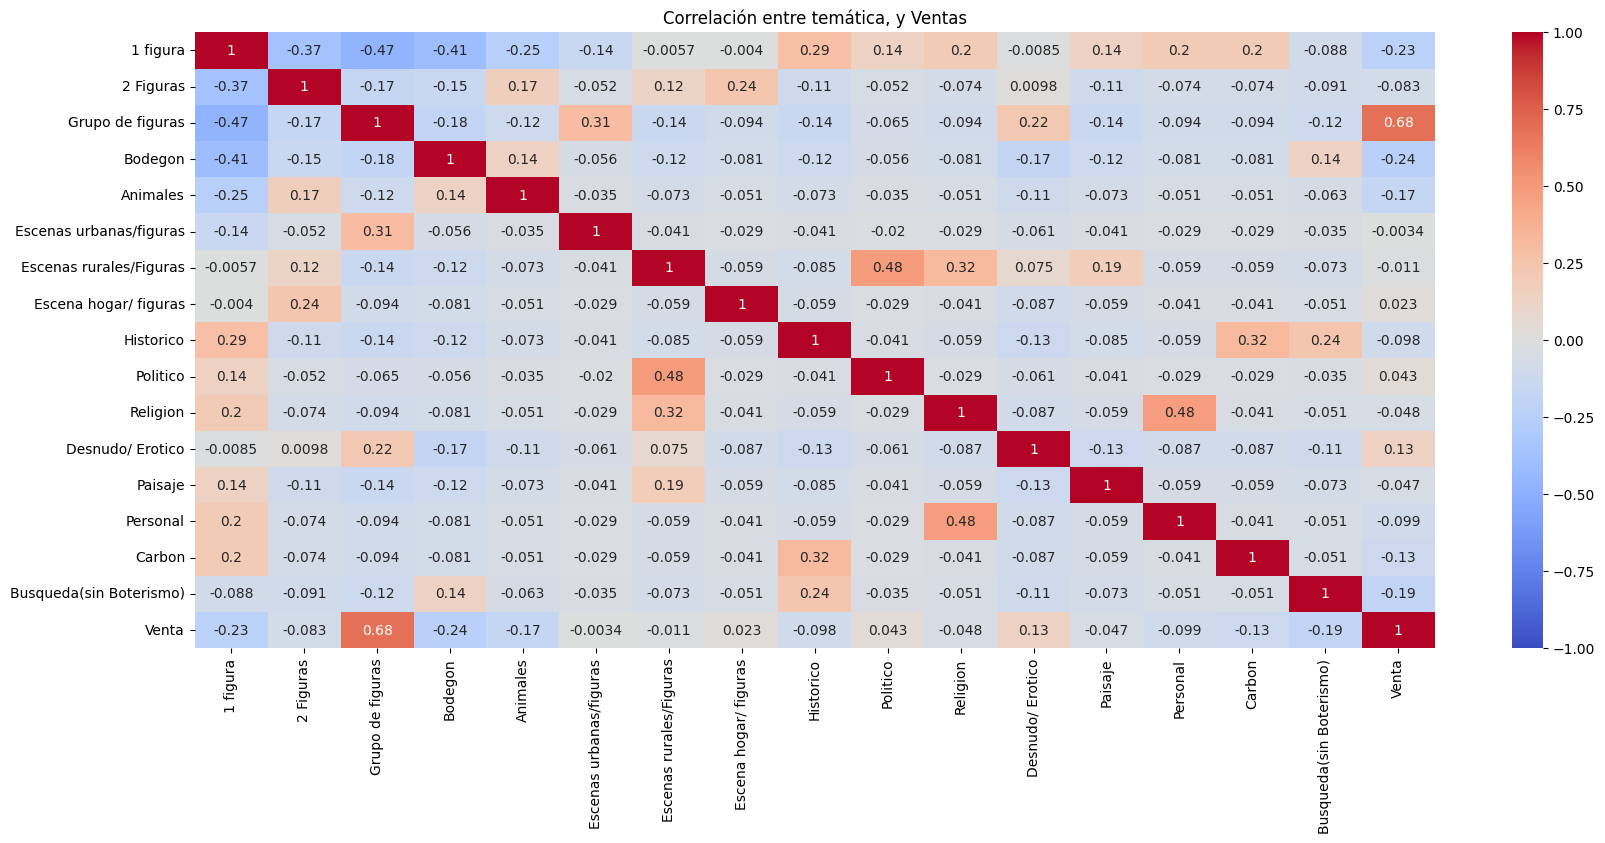

In [102]:

# Recalculate the correlation matrix including Área
corr_matrix = df_botero[[ '1 figura', '2 Figuras',
       'Grupo de figuras', 'Bodegon', 'Animales', 'Escenas urbanas/figuras',
       'Escenas rurales/Figuras', 'Escena hogar/ figuras', 'Historico',
       'Politico', 'Religion', 'Desnudo/ Erotico', 'Paisaje', 'Personal',
       'Carbon', 'Busqueda(sin Boterismo)', "Venta"]].corr()
print(corr_matrix)

# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # You can change (12, 8) to whatever size you prefer
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0
)
plt.title("Correlación entre temática, y Ventas")
plt.show()


Conclusión: Los temas que tienen varias figuras tienden una correlación positiva con el precio. Esto tiene sentido en el contexto de la obra del Maestro Fernando Botero, debido a que el figurismo del "Boterismo" se puede expresar mejor. No se eliminan los temas debido a que será una manera para categorizar el cuadro de manera mas sencilla, dado que usaremos como modelo el "Coseno de similitud".

2.10.3 Enviamos el dataframe a una tabla de Excel

In [103]:
df_botero.to_excel(r"C:\Users\param\OneDrive\Escritorio\Programacion\Botero\Datos_modelo_botero.xlsx", index=False)